In [1]:
import numpy as np

import neu4mes
from neu4mes import *
from neu4mes import relation

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>---- neu4mes ----<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [2]:
def fun(x,K):
    return x**2+x*K

In [3]:
relation.CHECK_NAMES = False
v = Input('v')
out1 = Output('out1',ParamFun(fun)(Fir(v.last())))
out2 = Output('out2',Linear(Fuzzify(centers=[-3,0,5])(Fir(v.last()))))
relation.CHECK_NAMES = True

In [4]:
n = Neu4mes(MPLNotebookVisualizer())
n.addModel('model',[out1,out2])
n.addMinimize('err1',v.next(),out1)
n.addMinimize('err2',v.last(),out2)
n.neuralizeModel(1)

================================ Neu4mes Model =================================
{'Constants': {},
 'Functions': {'FFuzzify3': {'centers': [-3, 0, 5],
                             'dim_out': {'dim': 3},
                             'functions': 'Triangular',
                             'names': 'Triangular'},
               'FParamFun1': {'code': 'def fun(x,K):\n    return x**2+x*K\n',
                              'in_dim': [{'dim': 1, 'sw': 1}],
                              'map_over_dim': False,
                              'n_input': 1,
                              'name': 'fun',
                              'out_dim': {'dim': 1, 'sw': 1},
                              'params_and_consts': ['FParamFun1K']}},
 'Inputs': {'v': {'dim': 1, 'sw': [-1, 1], 'tw': [0, 0]}},
 'Minimizers': {'err1': {'A': 'SamplePart13', 'B': 'out1', 'loss': 'mse'},
                'err2': {'A': 'SamplePart15', 'B': 'out2', 'loss': 'mse'}},
 'Models': 'model',
 'Outputs': {'out1': 'ParamFun4', 'out2': '

In [5]:
n.visualizer.showFunctions(['FParamFun9'])

In [6]:
data = {'v':np.linspace(1,10,num=100).tolist()}
n.loadData('train',data)

============================ Neu4mes Model Dataset =============================
Dataset Name:                 train
Number of files:              1
Total number of samples:      99
Shape of v:                   (99, 2, 1)


======================== Neu4mes Model Train Parameters ========================
models:                       ['model']
train dataset:                train_train_0.70
train {batch size, samples}:  {69, 69}
val dataset:                  validation_train_0.20
val {batch size, samples}:    {1, 20}
test dataset:                 test_train_0.10
test {batch size, samples}:   {1, 10}
num of epochs:                100
shuffle data:                 True
minimizers:                   {'err1': {'A': 'SamplePart13',
                                        'B': 'out1',
                                        'loss': 'mse'},
                               'err2': {'A': 'SamplePart15',
                                        'B': 'out2',
                                        'loss': 'mse'}}
optimizer:                    Adam
optimizer defaults:           {'lr': 0.001}
optimizer params:             [{'params': 'FParamFun1K'},
                               {'params': 'PFir2p'},
                    

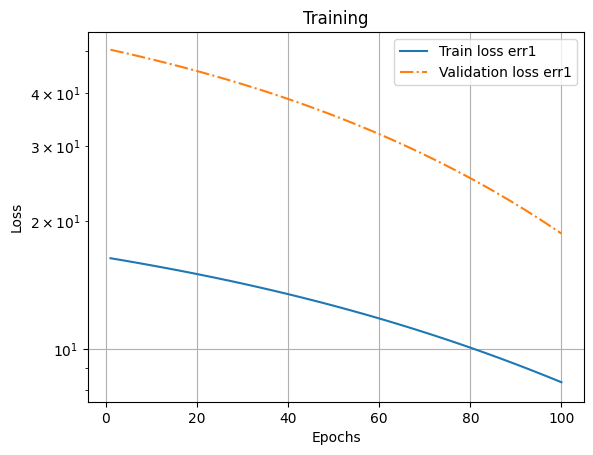

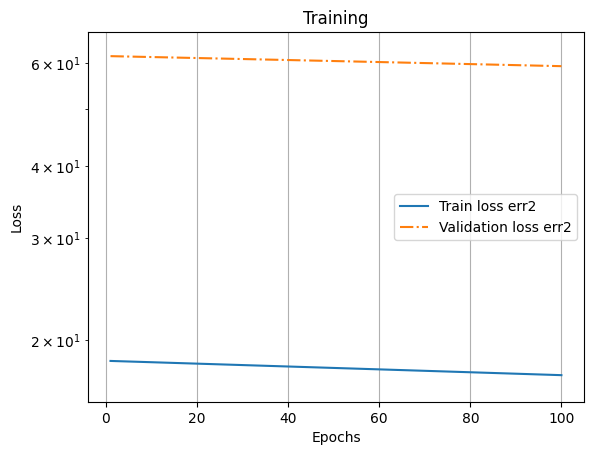

============================ Neu4mes Training Time =============================
Total time of Training:       0.5591659545898438
============== Neu4mes Model Results for train_train_0.70 ==============
|   Loss   |        mse        |        FVU        |        AIC        |
|          |    small better   |    small better   |    lower better   |
|----------------------------------------------------------------------|
|   err1   |     8.262e+00     |     7.179e-01     |     7.679e+02     |
|   err2   |     1.741e+01     |     3.407e+02     |     6.106e+02     |
|----------------------------------------------------------------------|
|  Total   |     1.284e+01     |     1.707e+02     |     6.893e+02     |
|----------------------------------------------------------------------|


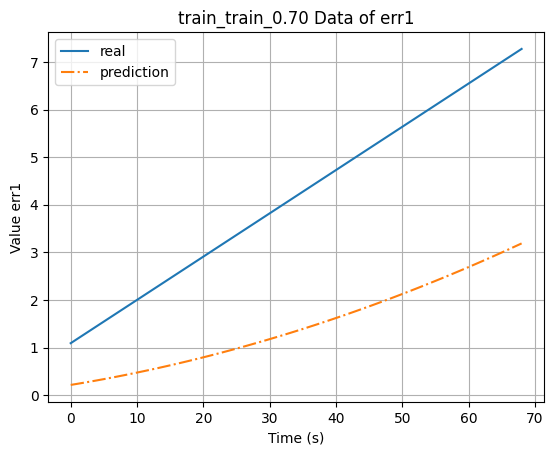

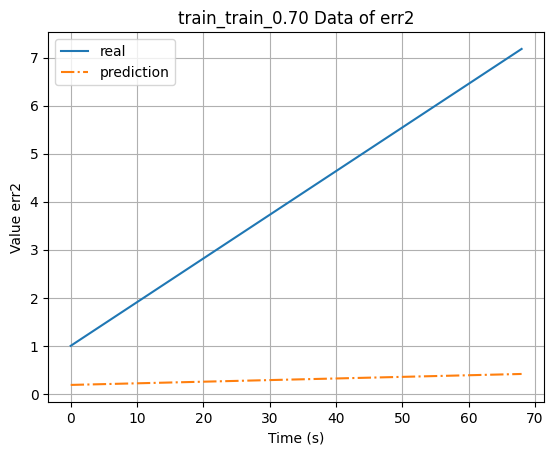

=========== Neu4mes Model Results for validation_train_0.20 ============
|   Loss   |        mse        |        FVU        |        AIC        |
|          |    small better   |    small better   |    lower better   |
|----------------------------------------------------------------------|
|   err1   |     1.866e+01     |      6.35e-02     |     2.817e+04     |
|   err2   |     5.934e+01     |     3.407e+02     |     4.678e+03     |
|----------------------------------------------------------------------|
|  Total   |      3.9e+01      |     1.704e+02     |     1.642e+04     |
|----------------------------------------------------------------------|


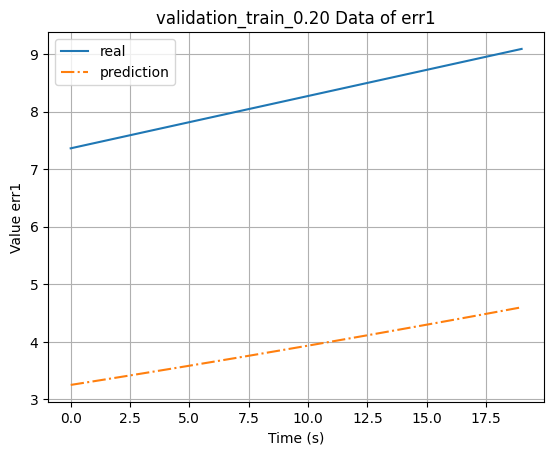

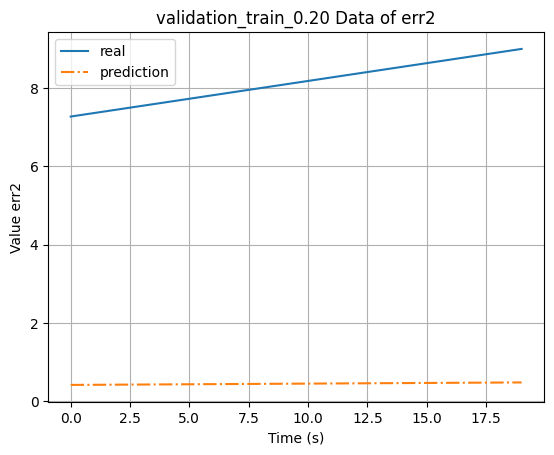

============== Neu4mes Model Results for test_train_0.10 ===============
|   Loss   |        mse        |        FVU        |        AIC        |
|          |    small better   |    small better   |    lower better   |
|----------------------------------------------------------------------|
|   err1   |     2.075e+01     |     1.585e-02     |     2.193e+05     |
|   err2   |     8.127e+01     |     1.871e+04     |      1.2e+04      |
|----------------------------------------------------------------------|
|  Total   |     5.101e+01     |     9.353e+03     |     1.156e+05     |
|----------------------------------------------------------------------|


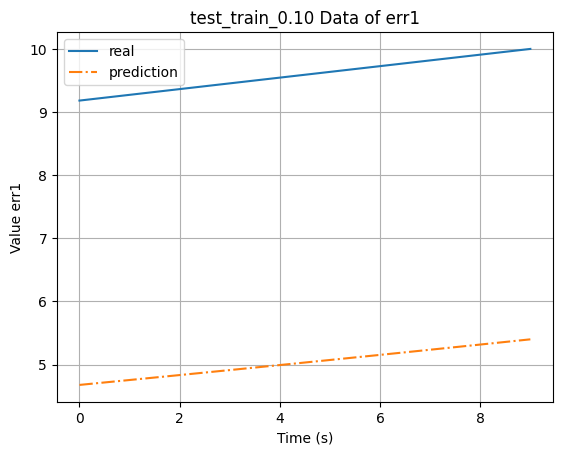

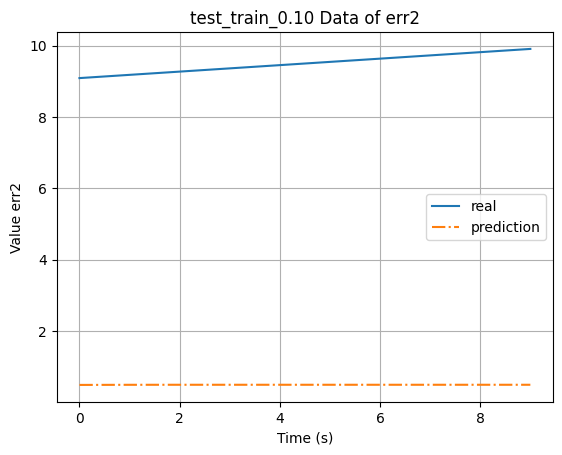

In [7]:
n.trainModel()

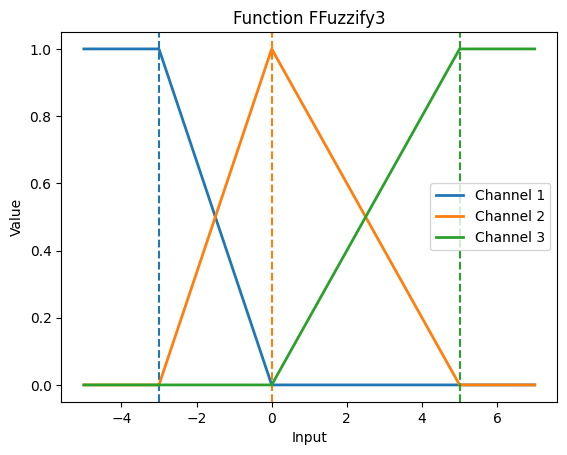

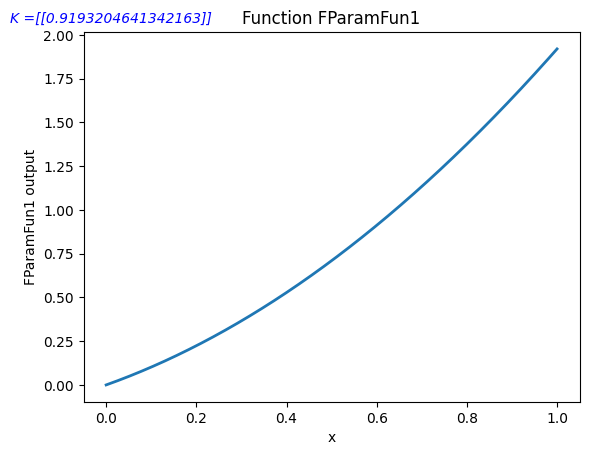

In [8]:
n.visualizer.showFunctions(list(n.model_def['Functions'].keys()))